In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/sample_submission.csv')

In [3]:
train

,ID,Age,Gender,Country,Race,Family_Background,Radiation_History,Iodine_Deficiency,Smoke,Weight_Risk,Diabetes,Nodule_Size,TSH_Result,T4_Result,T3_Result,Cancer
0,TRAIN_00000,80,M,CHN,ASN,Positive,Exposed,Sufficient,Non-Smoker,Not Obese,No,0.650355,2.784735,6.744603,2.575820,1
1,TRAIN_00001,37,M,NGA,ASN,Positive,Unexposed,Sufficient,Smoker,Obese,No,2.950430,0.911624,7.303305,2.505317,1
2,TRAIN_00002,71,M,CHN,MDE,Positive,Unexposed,Sufficient,Non-Smoker,Not Obese,Yes,2.200023,0.717754,11.137459,2.381080,0
3,TRAIN_00003,40,F,IND,HSP,Negative,Unexposed,Sufficient,Non-Smoker,Obese,No,3.370796,6.846380,10.175254,0.753023,0
4,TRAIN_00004,53,F,CHN,CAU,Negative,Unexposed,Sufficient,Non-Smoker,Not Obese,No,4.230048,0.439519,7.194450,0.569356,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87154,TRAIN_87154,65,F,IND,ASN,Positive,Unexposed,Sufficient,Non-Smoker,Not Obese,No,0.510802,3.786859,4.838150,0.625754,1
87155,TRAIN_87155,53,M,NGA,ASN,Negative,Unexposed,Sufficient,Non-Smoker,Obese,No,0.980413,4.335395,8.937716,2.728584,0
87156,TRAIN_87156,29,F,RUS,CAU,Negative,Unexposed,Sufficient,Non-Smoker,Not Obese,No,0.180998,5.724924,4.847265,3.318609,0
87157,TRAIN_87157,52,F,IND,ASN,Positive,Unexposed,Sufficient,Non-Smoker,Not Obese,No,2.420773,4.978069,10.867191,2.259199,1


In [4]:
test

,ID,Age,Gender,Country,Race,Family_Background,Radiation_History,Iodine_Deficiency,Smoke,Weight_Risk,Diabetes,Nodule_Size,TSH_Result,T4_Result,T3_Result
0,TEST_00000,53,M,NGA,CAU,Negative,Unexposed,Sufficient,Non-Smoker,Not Obese,No,2.940678,6.434501,9.227958,2.733846
1,TEST_00001,46,M,KOR,MDE,Negative,Unexposed,Deficient,Smoker,Obese,No,3.450129,4.729535,5.937664,0.775012
2,TEST_00002,78,F,IND,ASN,Negative,Exposed,Sufficient,Non-Smoker,Obese,No,4.680720,5.663475,10.455964,1.259896
3,TEST_00003,69,F,KOR,CAU,Negative,Unexposed,Sufficient,Non-Smoker,Not Obese,No,4.280588,7.473752,8.785335,2.826138
4,TEST_00004,77,F,KOR,CAU,Positive,Unexposed,Sufficient,Non-Smoker,Obese,No,3.380094,7.099987,8.737063,3.453563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46199,TEST_46199,17,F,RUS,ASN,Negative,Exposed,Sufficient,Non-Smoker,Not Obese,No,0.050563,7.356242,7.729139,1.038126
46200,TEST_46200,37,M,JPN,MDE,Negative,Unexposed,Deficient,Non-Smoker,Not Obese,No,3.010883,3.981898,6.739967,2.252667
46201,TEST_46201,18,M,IND,CAU,Negative,Unexposed,Sufficient,Smoker,Not Obese,No,4.780738,3.142235,11.883107,1.044195
46202,TEST_46202,39,M,IND,AFR,Negative,Unexposed,Sufficient,Non-Smoker,Not Obese,No,0.420837,3.534950,8.294455,1.774779


In [5]:
submission

,ID,Cancer
0,TEST_00000,0
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,0
...,...,...
46199,TEST_46199,0
46200,TEST_46200,0
46201,TEST_46201,0
46202,TEST_46202,0


In [6]:
train.shape

(87159, 16)

In [7]:
train.columns

Index(['ID', 'Age', 'Gender', 'Country', 'Race', 'Family_Background',
       'Radiation_History', 'Iodine_Deficiency', 'Smoke', 'Weight_Risk',
       'Diabetes', 'Nodule_Size', 'TSH_Result', 'T4_Result', 'T3_Result',
       'Cancer'],
      dtype='object')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87159 entries, 0 to 87158
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 87159 non-null  object 
 1   Age                87159 non-null  int64  
 2   Gender             87159 non-null  object 
 3   Country            87159 non-null  object 
 4   Race               87159 non-null  object 
 5   Family_Background  87159 non-null  object 
 6   Radiation_History  87159 non-null  object 
 7   Iodine_Deficiency  87159 non-null  object 
 8   Smoke              87159 non-null  object 
 9   Weight_Risk        87159 non-null  object 
 10  Diabetes           87159 non-null  object 
 11  Nodule_Size        87159 non-null  float64
 12  TSH_Result         87159 non-null  float64
 13  T4_Result          87159 non-null  float64
 14  T3_Result          87159 non-null  float64
 15  Cancer             87159 non-null  int64  
dtypes: float64(4), int64(2

**불필요한 컬럼 제거** (ID 제거)

In [9]:
train = train.drop(['ID'],axis=1)
test = test.drop(['ID'],axis=1)

In [10]:
train

,Age,Gender,Country,Race,Family_Background,Radiation_History,Iodine_Deficiency,Smoke,Weight_Risk,Diabetes,Nodule_Size,TSH_Result,T4_Result,T3_Result,Cancer
0,80,M,CHN,ASN,Positive,Exposed,Sufficient,Non-Smoker,Not Obese,No,0.650355,2.784735,6.744603,2.575820,1
1,37,M,NGA,ASN,Positive,Unexposed,Sufficient,Smoker,Obese,No,2.950430,0.911624,7.303305,2.505317,1
2,71,M,CHN,MDE,Positive,Unexposed,Sufficient,Non-Smoker,Not Obese,Yes,2.200023,0.717754,11.137459,2.381080,0
3,40,F,IND,HSP,Negative,Unexposed,Sufficient,Non-Smoker,Obese,No,3.370796,6.846380,10.175254,0.753023,0
4,53,F,CHN,CAU,Negative,Unexposed,Sufficient,Non-Smoker,Not Obese,No,4.230048,0.439519,7.194450,0.569356,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87154,65,F,IND,ASN,Positive,Unexposed,Sufficient,Non-Smoker,Not Obese,No,0.510802,3.786859,4.838150,0.625754,1
87155,53,M,NGA,ASN,Negative,Unexposed,Sufficient,Non-Smoker,Obese,No,0.980413,4.335395,8.937716,2.728584,0
87156,29,F,RUS,CAU,Negative,Unexposed,Sufficient,Non-Smoker,Not Obese,No,0.180998,5.724924,4.847265,3.318609,0
87157,52,F,IND,ASN,Positive,Unexposed,Sufficient,Non-Smoker,Not Obese,No,2.420773,4.978069,10.867191,2.259199,1


**Null값 확인**

In [11]:
train.isnull().sum()

Age                  0
Gender               0
Country              0
Race                 0
Family_Background    0
Radiation_History    0
Iodine_Deficiency    0
Smoke                0
Weight_Risk          0
Diabetes             0
Nodule_Size          0
TSH_Result           0
T4_Result            0
T3_Result            0
Cancer               0
dtype: int64

In [12]:
train[['Country']].value_counts()


Country
IND        16309
CHN        13367
NGA        13217
RUS         8869
BRA         8856
JPN         7005
KOR         6219
GBR         4484
USA         4451
DEU         4382
Name: count, dtype: int64

**타켓 변수** 시각화

<Axes: xlabel='Cancer', ylabel='count'>

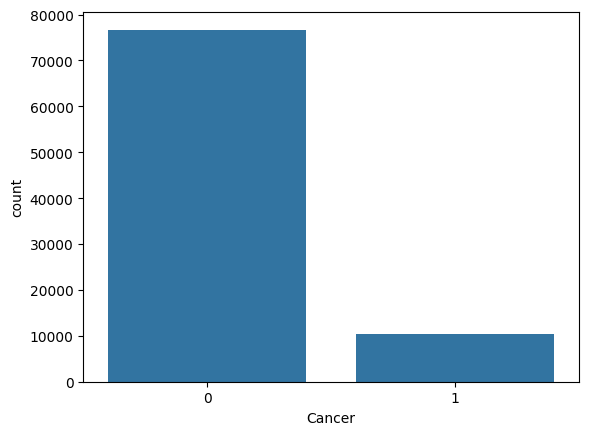

In [13]:
sns.countplot(x='Cancer',data=train)

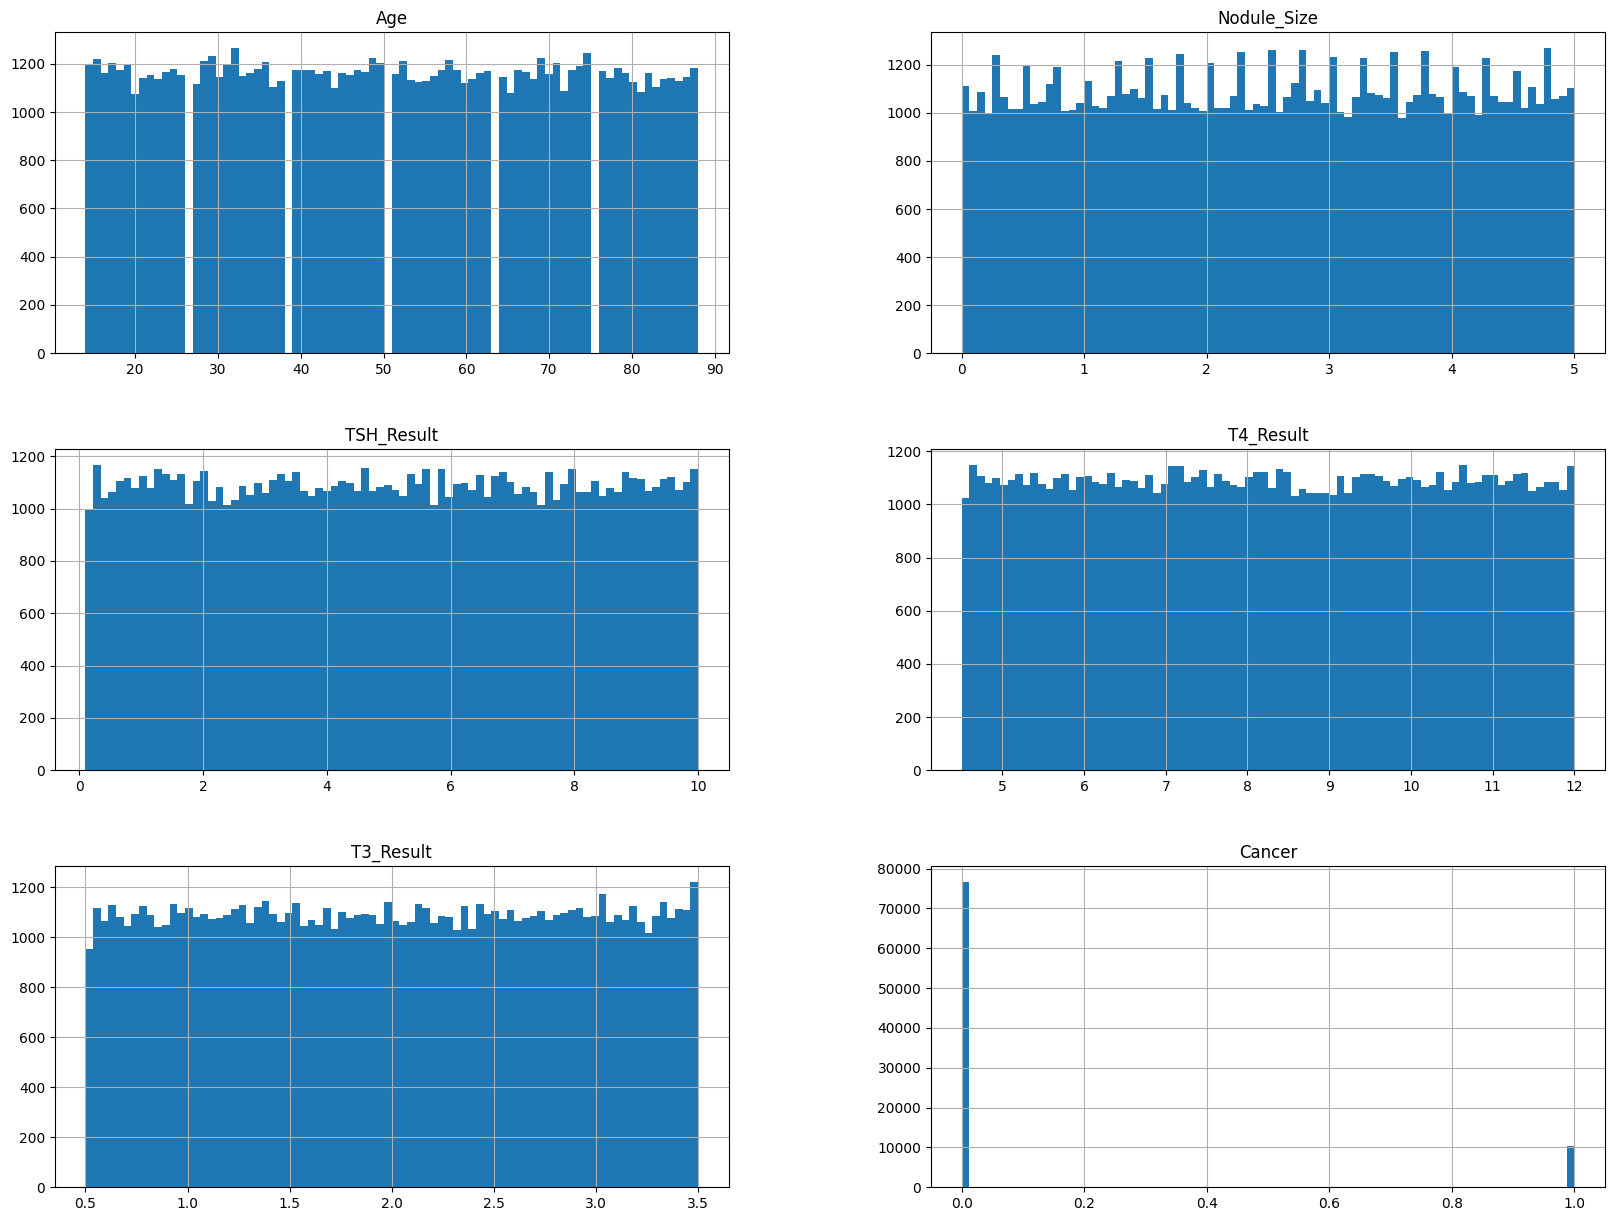

In [14]:
num_cols = train.describe().columns
train[num_cols].hist(bins=80, figsize=(20,15))
plt.show()

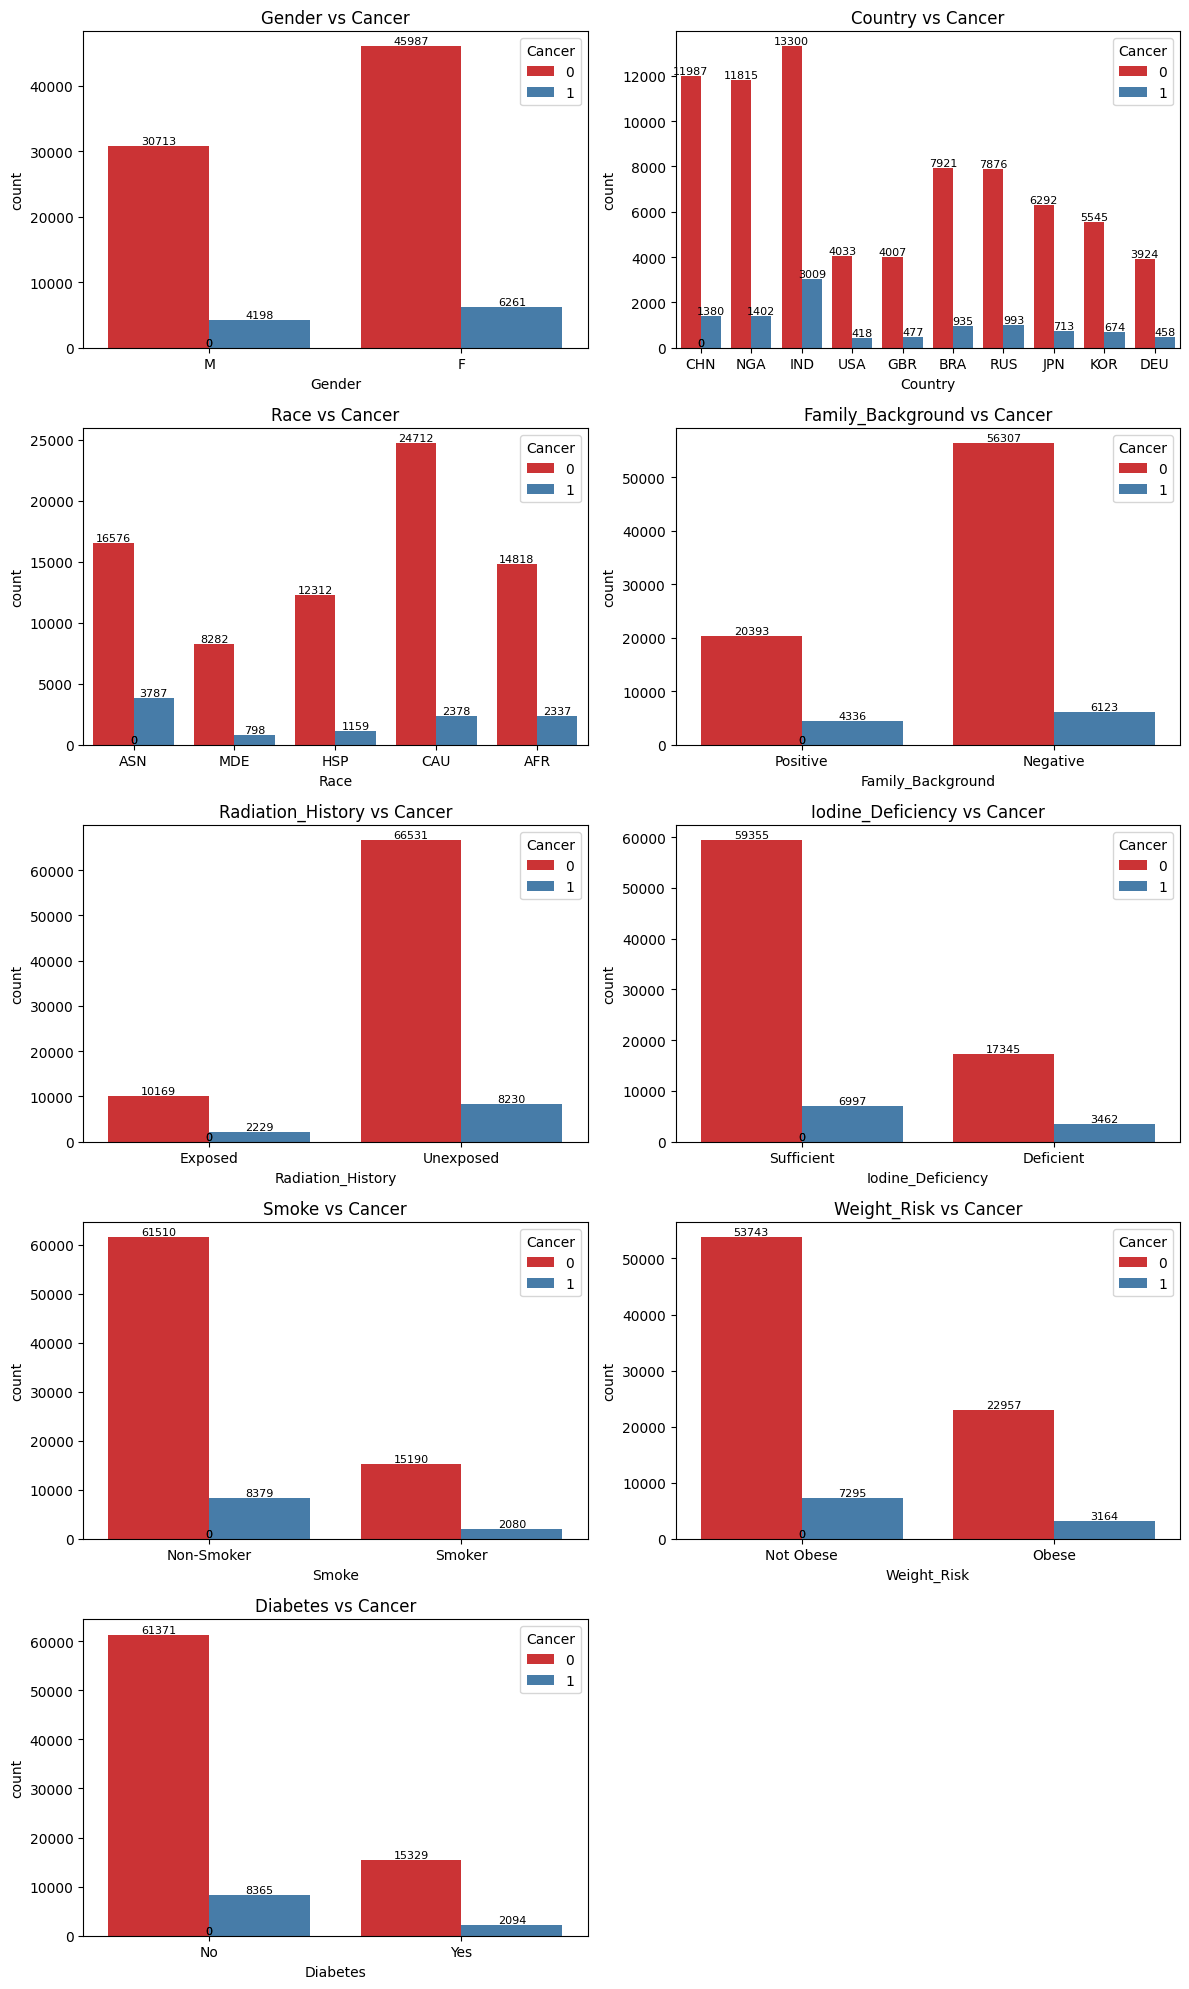

In [15]:
def plot_categorical_vs_target(data, cat_cols, target_col='Cancer'):
    n = len(cat_cols)
    ncols = 2
    nrows = (n + 1) // 2
    plt.figure(figsize=(ncols * 6, nrows * 4))

    for idx, col in enumerate(cat_cols, 1):
        plt.subplot(nrows, ncols, idx)
        # 타겟이 0/1일 때도 hue 옵션 그대로 사용 가능
        ax = sns.countplot(x=col, hue=target_col, data=data, palette='Set1')
        plt.title(f'{col} vs {target_col}')
        # 막대 위에 수치 표시
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=8)
    plt.tight_layout()
    plt.show()

cat_cols = train.columns[train.dtypes == 'object'].tolist()
# cat_cols = ['Gender', 'Race', 'Family_Background', 'Radiation_History',
#             'Iodine_Deficiency', 'Smoke', 'Weight_Risk', 'Diabetes']
plot_categorical_vs_target(train, cat_cols, target_col='Cancer')

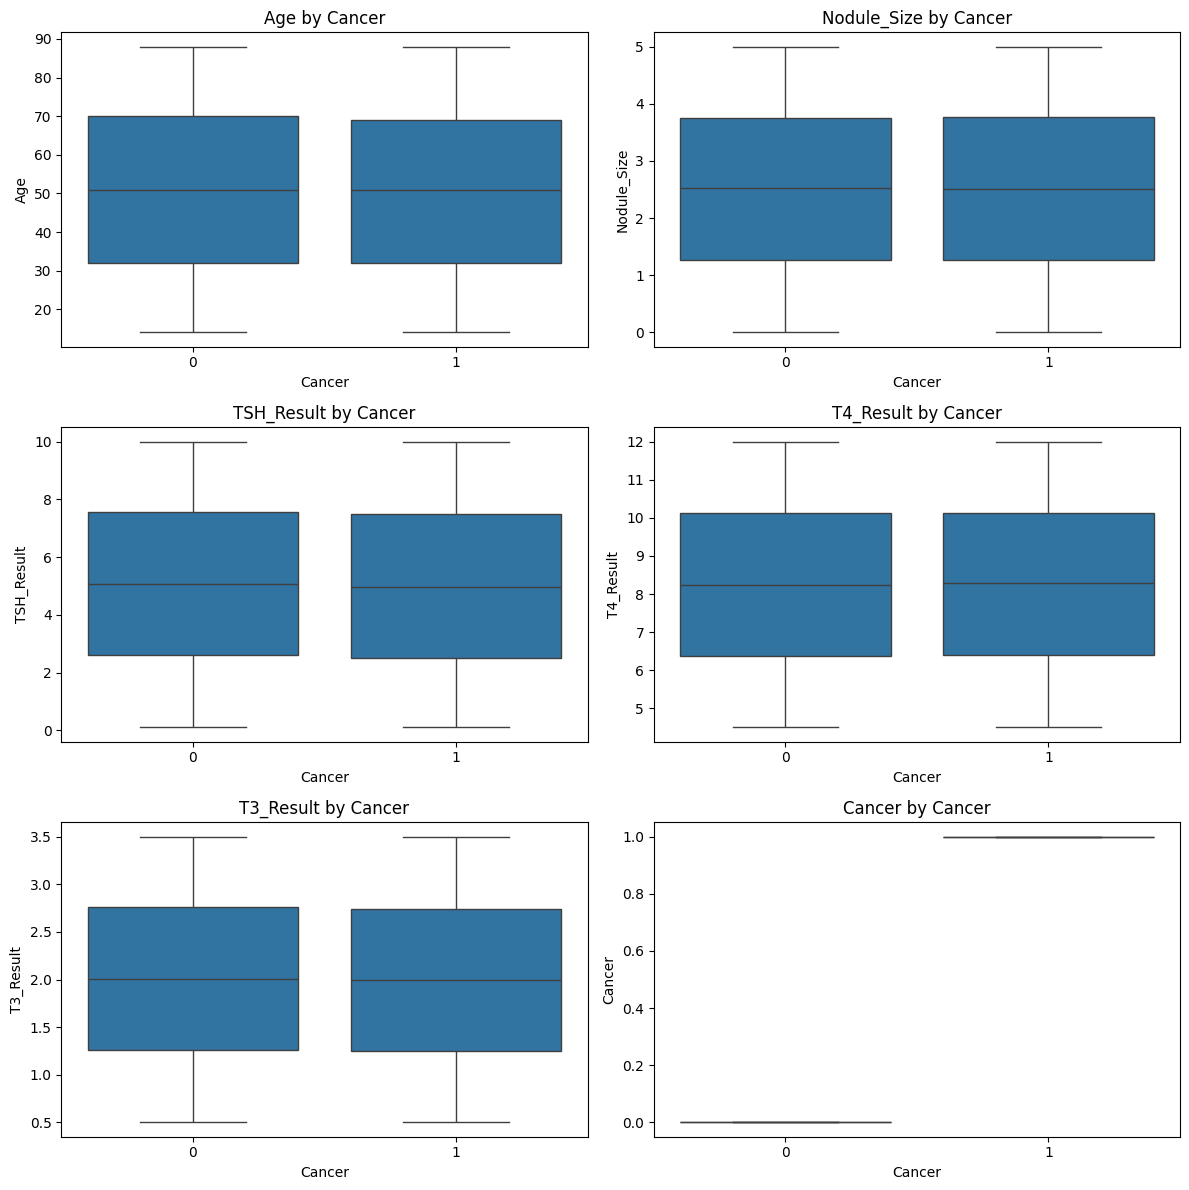

In [16]:
def plot_numerical_vs_target(data, num_cols, target_col='Cancer'):
    n = len(num_cols)
    ncols = 2
    nrows = (n + 1) // 2
    plt.figure(figsize=(ncols * 6, nrows * 4))
    for idx, col in enumerate(num_cols, 1):
        plt.subplot(nrows, ncols, idx)
        sns.boxplot(x=target_col, y=col, data=data)
        plt.title(f'{col} by {target_col}')
    plt.tight_layout()
    plt.show()

plot_numerical_vs_target(train, num_cols, target_col='Cancer')

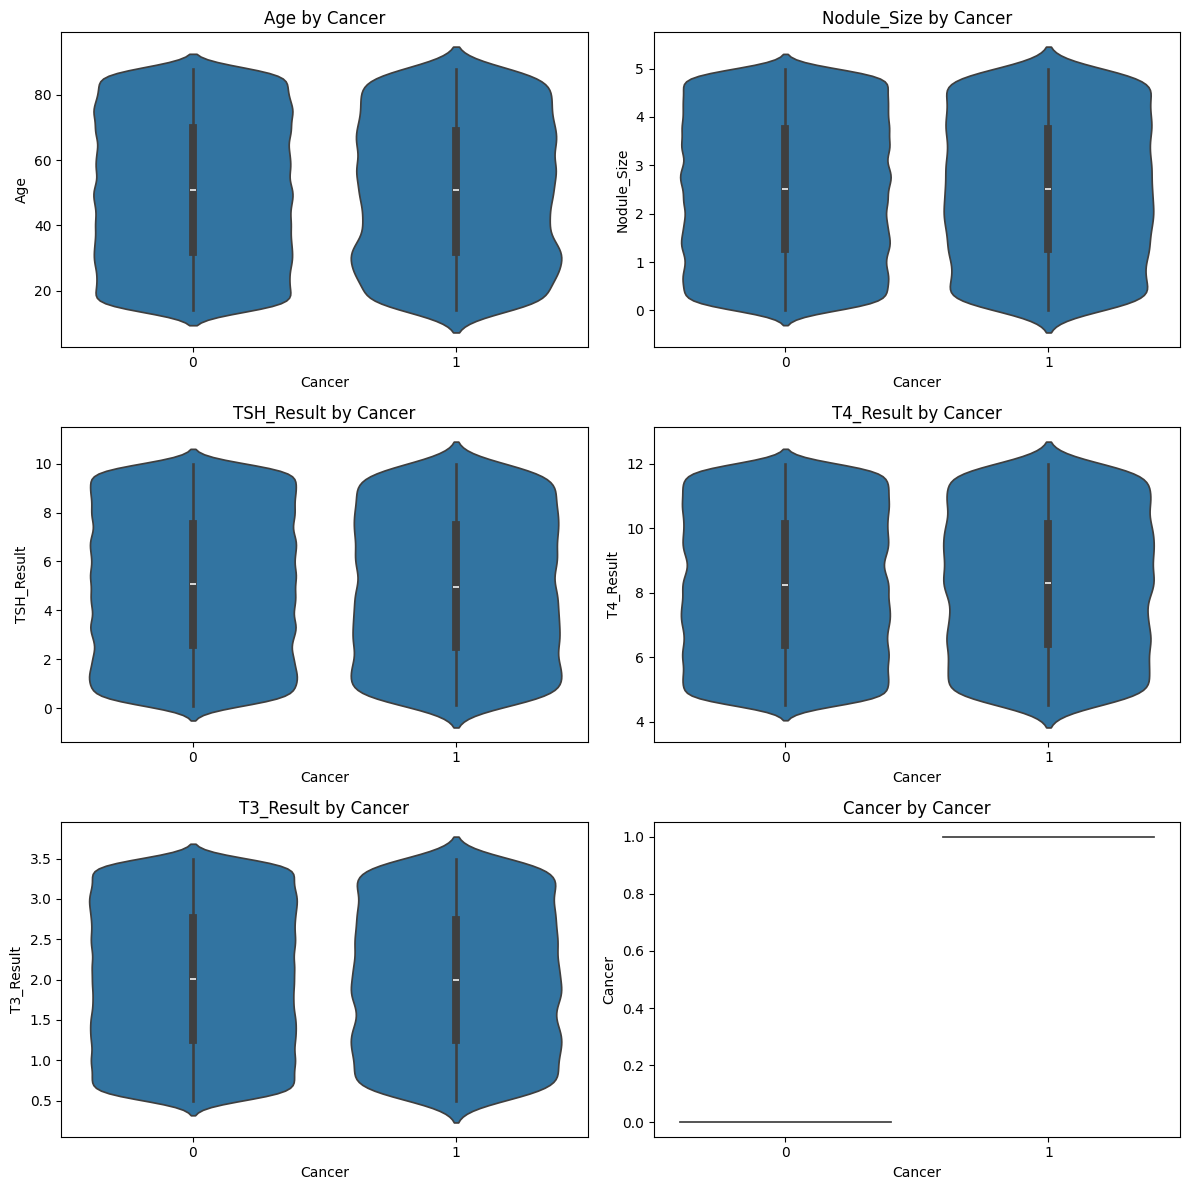

In [17]:
def plot_violin_numerical_vs_target(data, num_cols, target_col='Cancer'):
    n = len(num_cols)
    ncols = 2
    nrows = (n + 1) // 2
    plt.figure(figsize=(ncols * 6, nrows * 4))
    for idx, col in enumerate(num_cols, 1):
        plt.subplot(nrows, ncols, idx)
        sns.violinplot(x=target_col, y=col, data=data)
        plt.title(f'{col} by {target_col}')
    plt.tight_layout()
    plt.show()
    
plot_violin_numerical_vs_target(train, num_cols, target_col='Cancer')

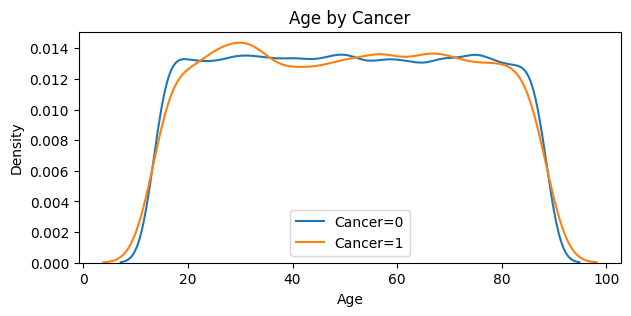

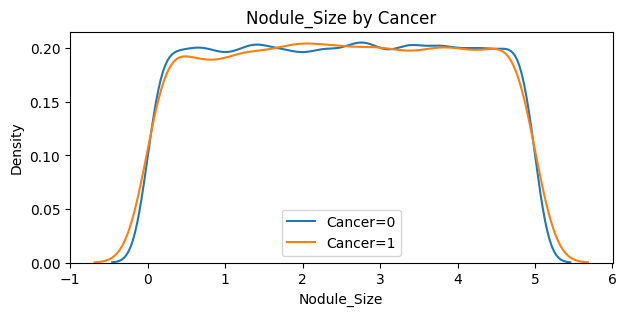

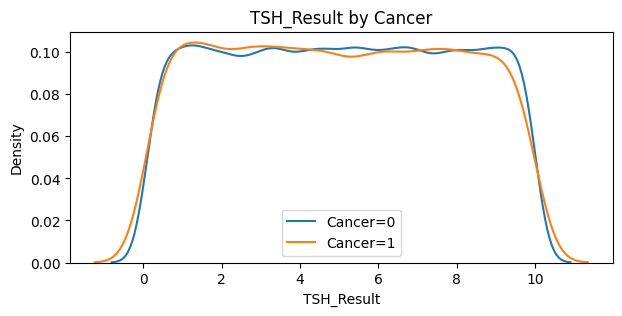

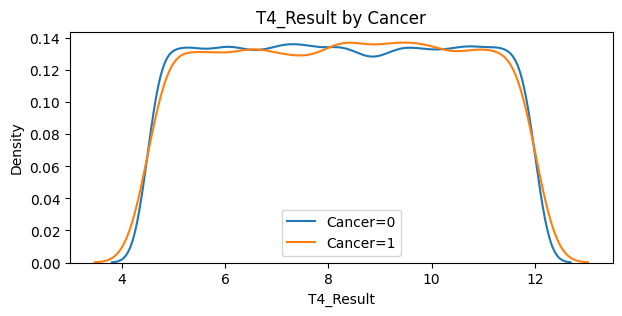

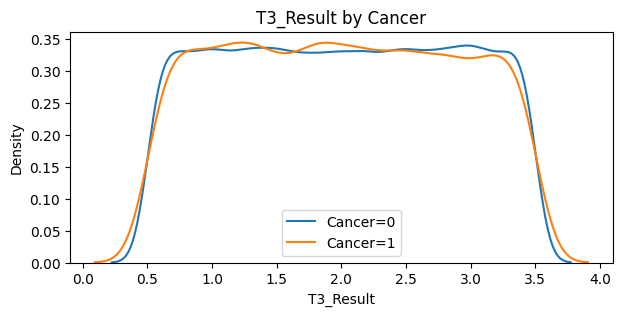

/var/folders/q1/wy16nfjn4sn4s87yr7501dc40000gn/T/ipykernel_30995/3858854217.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[data[target_col]==val][col], label=f'{target_col}={val}')
/var/folders/q1/wy16nfjn4sn4s87yr7501dc40000gn/T/ipykernel_30995/3858854217.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[data[target_col]==val][col], label=f'{target_col}={val}')
/var/folders/q1/wy16nfjn4sn4s87yr7501dc40000gn/T/ipykernel_30995/3858854217.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


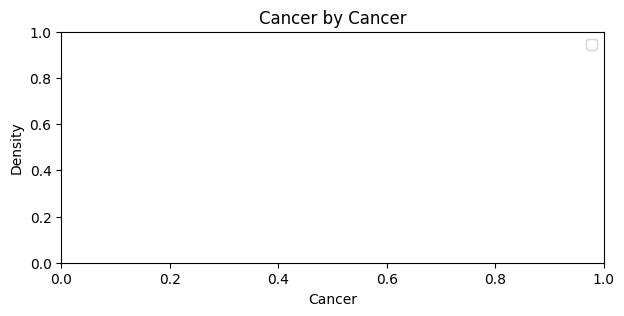

In [18]:
def plot_kde_by_target(data, num_cols, target_col='Cancer'):
    for col in num_cols:
        plt.figure(figsize=(7,3))
        for val in sorted(data[target_col].unique()):
            sns.kdeplot(data[data[target_col]==val][col], label=f'{target_col}={val}')
        plt.title(f'{col} by {target_col}')
        plt.legend()
        plt.show()
        
plot_kde_by_target(train, num_cols, target_col='Cancer')
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder
def preprocess_and_engineer(df):
    # 파생변수 생성
    # (1) 고령 여부
    df['Old'] = (df['Age'] >= 60).astype(int)
    # (2) 큰 결절
    df['Large_Nodule'] = (df['Nodule_Size'] >= 3).astype(int)
    # (3) 호르몬 이상 (TSH, T4, T3 기준 임의 설정)
    df['Hormone_Abnormal'] = (
        (df['TSH_Result'] < 0.4) | (df['TSH_Result'] > 4.0) |
        (df['T4_Result'] < 5.0) | (df['T4_Result'] > 12.0) |
        (df['T3_Result'] < 0.8) | (df['T3_Result'] > 2.0)
    ).astype(int)
    # (4) 리스크 요인 합산 (흡연, 가족력, 비만, 방사선, 당뇨, 요오드결핍)
    risk_features = [
        ('Family_Background', 'Positive'),
        ('Radiation_History', 'Exposed'),
        ('Iodine_Deficiency', 'Deficient'),
        ('Smoke', 'Smoker'),
        ('Weight_Risk', 'Obese'),
        ('Diabetes', 'Yes')
    ]
    risk_score = pd.Series(0, index=df.index)
    for col, pos_val in risk_features:
        risk_score += (df[col] == pos_val).astype(int)
    df['Risk_Score'] = risk_score

    # 범주형 변수 라벨 인코딩
    le_dict = {}
    for col in df.select_dtypes('object').columns:
        if col == 'Cancer':
            continue  # 타겟값은 인코딩 불필요
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        le_dict[col] = le

    # 4. 결측치 처리 (혹시라도)
    for col in df.select_dtypes(['float', 'int']).columns:
        if df[col].isnull().any():
            df[col] = df[col].fillna(df[col].median())

    return df, le_dict

# 적용 예시
# train = pd.read_csv('...')
# test = pd.read_csv('...')
train_processed, le_dict = preprocess_and_engineer(train)
test_processed, _ = preprocess_and_engineer(test)

In [20]:
train_processed

,Age,Gender,Country,Race,Family_Background,Radiation_History,Iodine_Deficiency,Smoke,Weight_Risk,Diabetes,Nodule_Size,TSH_Result,T4_Result,T3_Result,Cancer,Old,Large_Nodule,Hormone_Abnormal,Risk_Score
0,80,1,1,1,1,0,1,0,0,0,0.650355,2.784735,6.744603,2.575820,1,1,0,1,2
1,37,1,7,1,1,1,1,1,1,0,2.950430,0.911624,7.303305,2.505317,1,0,0,1,3
2,71,1,1,4,1,1,1,0,0,1,2.200023,0.717754,11.137459,2.381080,0,1,0,1,2
3,40,0,4,3,0,1,1,0,1,0,3.370796,6.846380,10.175254,0.753023,0,0,1,1,1
4,53,0,1,2,0,1,1,0,0,0,4.230048,0.439519,7.194450,0.569356,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87154,65,0,4,1,1,1,1,0,0,0,0.510802,3.786859,4.838150,0.625754,1,1,0,1,1
87155,53,1,7,1,0,1,1,0,1,0,0.980413,4.335395,8.937716,2.728584,0,0,0,1,1
87156,29,0,8,2,0,1,1,0,0,0,0.180998,5.724924,4.847265,3.318609,0,0,0,1,0
87157,52,0,4,1,1,1,1,0,0,0,2.420773,4.978069,10.867191,2.259199,1,0,0,1,1


In [21]:
# age 는 제거하고 청년, 중년초, 중년후, 노년으로 나누기
age_bins = [0, 30, 45, 60, 120] 
age_labels = ['Youth', 'Early_Middle_Age', 'Late_Middle_Age', 'Old']
train_processed['Age_Group'] = pd.cut(train_processed['Age'], bins=age_bins, labels=age_labels, right=False)
test_processed['Age_Group'] = pd.cut(test_processed['Age'], bins=age_bins, labels=age_labels, right=False)


<Axes: xlabel='Age', ylabel='Count'>

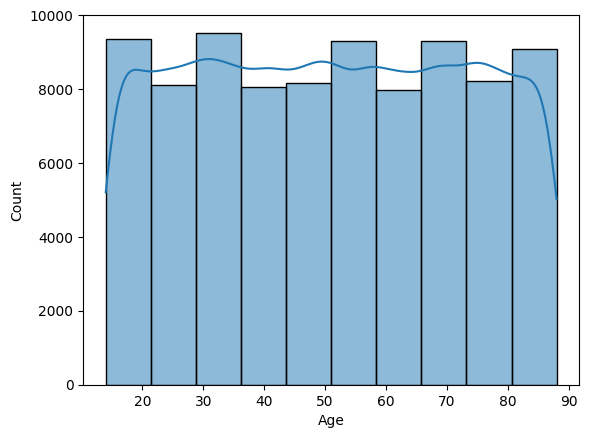

In [22]:
sns.histplot(train_processed['Age'], bins=10, kde=True)

In [23]:
train_processed = train_processed.drop(['Age'], axis=1)
test_processed = test_processed.drop(['Age'], axis=1)

In [24]:
train_processed['Age_Group'] = train_processed['Age_Group'].map({
    'Youth': 0,
    'Early_Middle_Age': 1,
    'Late_Middle_Age': 2,
    'Old': 3
})
test_processed['Age_Group'] = test_processed['Age_Group'].map({
    'Youth': 0,
    'Early_Middle_Age': 1,
    'Late_Middle_Age': 2,
    'Old': 3
})

In [25]:
train_processed

,Gender,Country,Race,Family_Background,Radiation_History,Iodine_Deficiency,Smoke,Weight_Risk,Diabetes,Nodule_Size,TSH_Result,T4_Result,T3_Result,Cancer,Old,Large_Nodule,Hormone_Abnormal,Risk_Score,Age_Group
0,1,1,1,1,0,1,0,0,0,0.650355,2.784735,6.744603,2.575820,1,1,0,1,2,3
1,1,7,1,1,1,1,1,1,0,2.950430,0.911624,7.303305,2.505317,1,0,0,1,3,1
2,1,1,4,1,1,1,0,0,1,2.200023,0.717754,11.137459,2.381080,0,1,0,1,2,3
3,0,4,3,0,1,1,0,1,0,3.370796,6.846380,10.175254,0.753023,0,0,1,1,1,1
4,0,1,2,0,1,1,0,0,0,4.230048,0.439519,7.194450,0.569356,1,0,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87154,0,4,1,1,1,1,0,0,0,0.510802,3.786859,4.838150,0.625754,1,1,0,1,1,3
87155,1,7,1,0,1,1,0,1,0,0.980413,4.335395,8.937716,2.728584,0,0,0,1,1,2
87156,0,8,2,0,1,1,0,0,0,0.180998,5.724924,4.847265,3.318609,0,0,0,1,0,0
87157,0,4,1,1,1,1,0,0,0,2.420773,4.978069,10.867191,2.259199,1,0,0,1,1,2


In [26]:
test_processed

,Gender,Country,Race,Family_Background,Radiation_History,Iodine_Deficiency,Smoke,Weight_Risk,Diabetes,Nodule_Size,TSH_Result,T4_Result,T3_Result,Old,Large_Nodule,Hormone_Abnormal,Risk_Score,Age_Group
0,1,7,2,0,1,1,0,0,0,2.940678,6.434501,9.227958,2.733846,0,0,1,0,2
1,1,6,4,0,1,0,1,1,0,3.450129,4.729535,5.937664,0.775012,0,1,1,3,2
2,0,4,1,0,0,1,0,1,0,4.680720,5.663475,10.455964,1.259896,1,1,1,2,3
3,0,6,2,0,1,1,0,0,0,4.280588,7.473752,8.785335,2.826138,1,1,1,0,3
4,0,6,2,1,1,1,0,1,0,3.380094,7.099987,8.737063,3.453563,1,1,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46199,0,8,1,0,0,1,0,0,0,0.050563,7.356242,7.729139,1.038126,0,0,1,1,0
46200,1,5,4,0,1,0,0,0,0,3.010883,3.981898,6.739967,2.252667,0,1,1,1,1
46201,1,4,2,0,1,1,1,0,0,4.780738,3.142235,11.883107,1.044195,0,1,0,1,0
46202,1,4,0,0,1,1,0,0,0,0.420837,3.534950,8.294455,1.774779,0,0,0,0,1


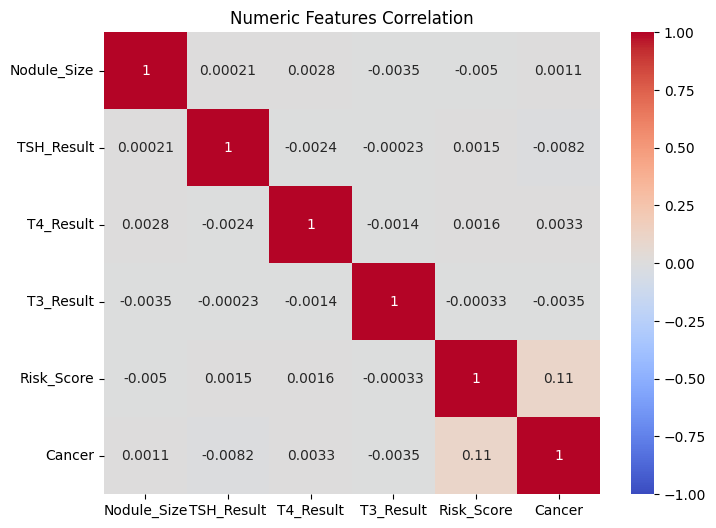

In [27]:
num_cols = ['Nodule_Size', 'TSH_Result', 'T4_Result', 'T3_Result', 'Risk_Score']
corr = train_processed[num_cols + ['Cancer']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Numeric Features Correlation')
plt.show()

**모델 튜닝 (GridSearchCV/Optuna)**

In [28]:
# (1) 합치기
train['__is_train__'] = 1
test['__is_train__'] = 0
full = pd.concat([train, test], sort=False).reset_index(drop=True)

# (2) 범주형 컬럼 자동 추출 (object + category)
cat_cols = [col for col in full.columns if full[col].dtype in ['object', 'category'] and col != 'Cancer']

# (3) pd.Categorical로 모든 범주 통일
for col in cat_cols:
    full[col] = pd.Categorical(full[col])

# (4) 라벨 인코딩(모든 sklearn/LGBM/앙상블 호환)
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    le = LabelEncoder()
    full[col] = le.fit_transform(full[col].astype(str))

# (5) 결측치 처리 (모든 컬럼 일괄)
full = full.fillna(0)

# (6) 다시 분리 (test에서는 Cancer 반드시 drop)
train_processed = full[full['__is_train__'] == 1].drop(['__is_train__'], axis=1).reset_index(drop=True)
test_processed = full[full['__is_train__'] == 0].drop(['__is_train__', 'Cancer'], axis=1).reset_index(drop=True)

In [29]:
from sklearn.model_selection import train_test_split

X = train_processed.drop('Cancer', axis=1)
y = train_processed['Cancer']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(69727, 19) (69727,)
(17432, 19) (17432,)


In [30]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# LightGBM
lgbm_grid = GridSearchCV(
    LGBMClassifier(random_state=42),
    {'num_leaves':[15,31],'learning_rate':[0.01,0.1],'n_estimators':[100,300]},
    scoring='f1', cv=3, n_jobs=-1
)
lgbm_grid.fit(X_train, y_train)
best_lgbm = lgbm_grid.best_estimator_

# CatBoost
cat_grid = GridSearchCV(
    CatBoostClassifier(verbose=0, random_state=42),
    {'depth':[4,6],'learning_rate':[0.01,0.1],'iterations':[200,400]},
    scoring='f1', cv=3, n_jobs=-1
)
cat_grid.fit(X_train, y_train)
best_cat = cat_grid.best_estimator_

# XGBoost
xgb_grid = GridSearchCV(
    XGBClassifier(tree_method='hist', use_label_encoder=False, eval_metric='logloss', random_state=42),
    {'max_depth':[4,6],'learning_rate':[0.01,0.1],'n_estimators':[100,300]},
    scoring='f1', cv=3, n_jobs=-1
)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_

[LightGBM] [Info] Number of positive: 5578, number of negative: 40906
[LightGBM] [Info] Number of positive: 5578, number of negative: 40907
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 46485, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119996 -> initscore=-1.992471
[LightGBM] [Info] Start training from score -1.992471
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 46484, number of used features: 19
[LightGBM] [Info] [b

/Users/songbeom/PythonWorkSpace/ML_Project/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:47:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/songbeom/PythonWorkSpace/ML_Project/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:47:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/songbeom/PythonWorkSpace/ML_Project/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:47:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/songbeom/PythonWorkSpace/ML_Project/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:47:59] WARNING: /Users/

In [31]:
set(train_processed.columns) - set(test_processed.columns)

{'Cancer'}

In [32]:
import numpy as np
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

X = train_processed.drop('Cancer', axis=1)
y = train_processed['Cancer']
X_test = test_processed.copy()

# 가장 단순한 튜닝 없이 기본 파라미터 사용 (먼저 정상동작 확인)
models = {
    'LGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42),
    'XGB': XGBClassifier(tree_method='hist', use_label_encoder=False, eval_metric='logloss', random_state=42),
    'RF': RandomForestClassifier(n_estimators=200, random_state=42),
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_means = {}

for name, model in models.items():
    f1s = []
    for train_idx, val_idx in skf.split(X, y):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]
        model.fit(X_tr, y_tr)
        val_pred = model.predict(X_val)
        f1s.append(f1_score(y_val, val_pred))
    f1_means[name] = np.mean(f1s)
    print(f'{name} 5-fold F1 평균: {f1_means[name]:.4f}')

# 베스트 모델 선정
best_model_name = max(f1_means, key=f1_means.get)
print(f'\n가장 높은 F1의 모델: {best_model_name} ({f1_means[best_model_name]:.4f})')
best_model = models[best_model_name]

# 전체 train으로 재학습 후 예측
best_model.fit(X, y)
test_pred = best_model.predict_proba(X_test)[:, 1]
submission['Cancer'] = (test_pred > 0.5).astype(int)
submission.to_csv(f'submission_best_{best_model_name.lower()}.csv', index=False)

# --- Stacking 앙상블 ---
stack_model = StackingClassifier(
    estimators=[
        ('lgbm', models['LGBM']),
        ('cat', models['CatBoost']),
        ('xgb', models['XGB']),
        ('rf', models['RF']),
    ],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    cv=5,
    n_jobs=-1
)
stack_model.fit(X, y)
stack_pred = stack_model.predict_proba(X_test)[:, 1]
submission['Cancer'] = (stack_pred > 0.5).astype(int)
submission.to_csv('submission_stacking.csv', index=False)

[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1140
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119997 -> initscore=-1.992463
[LightGBM] [Info] Start training from score -1.992463
[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1140
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [b

/Users/songbeom/PythonWorkSpace/ML_Project/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:48:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/songbeom/PythonWorkSpace/ML_Project/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:48:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/songbeom/PythonWorkSpace/ML_Project/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:48:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/songbeom/PythonWorkSpace/ML_Project/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:48:28] WARNING: /Users/

XGB 5-fold F1 평균: 0.3116
RF 5-fold F1 평균: 0.2271

가장 높은 F1의 모델: XGB (0.3116)


/Users/songbeom/PythonWorkSpace/ML_Project/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:49:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 10459, number of negative: 76700
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1140
[LightGBM] [Info] Number of data points in the train set: 87159, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119999 -> initscore=-1.992439
[LightGBM] [Info] Start training from score -1.992439


/Users/songbeom/PythonWorkSpace/ML_Project/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:49:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/songbeom/PythonWorkSpace/ML_Project/venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[14:50:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.



[LightGBM] [Info] Number of positive: 8368, number of negative: 61360
[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009737 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 69728, number of used features: 19
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [In

[14:50:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[14:50:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[14:50:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[14:50:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.



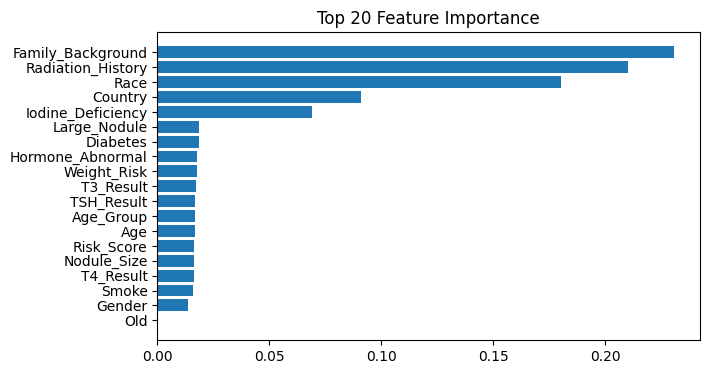

In [33]:
feat_imp = best_model.feature_importances_
feat_name = X.columns
sorted_idx = np.argsort(feat_imp)[::-1][:20]
plt.figure(figsize=(7,4))
plt.barh(np.array(feat_name)[sorted_idx], feat_imp[sorted_idx])
plt.title("Top 20 Feature Importance")
plt.gca().invert_yaxis()
plt.show()

In [34]:
result = pd.read_csv('submission_stacking.csv')
result.head()

,ID,Cancer
0,TEST_00000,0
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,0


In [35]:
from imblearn.over_sampling import SMOTE

X = train_processed.drop('Cancer', axis=1)
y = train_processed['Cancer']

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
print('Before SMOTE:', np.bincount(y))
print('After SMOTE:', np.bincount(y_res))

Before SMOTE: [76700 10459]
After SMOTE: [76700 76700]


/var/folders/q1/wy16nfjn4sn4s87yr7501dc40000gn/T/ipykernel_30995/440779396.py:8: DeprecationWarning: Non-integer input passed to bincount. In a future version of NumPy, this will be an error. (Deprecated NumPy 2.1)
  print('Before SMOTE:', np.bincount(y))
/var/folders/q1/wy16nfjn4sn4s87yr7501dc40000gn/T/ipykernel_30995/440779396.py:9: DeprecationWarning: Non-integer input passed to bincount. In a future version of NumPy, this will be an error. (Deprecated NumPy 2.1)
  print('After SMOTE:', np.bincount(y_res))


In [36]:
from sklearn.model_selection import GridSearchCV

# LightGBM 튜닝
lgbm_grid = GridSearchCV(
    LGBMClassifier(random_state=42, class_weight='balanced'), # 클래스가중치 부여
    {'num_leaves': [31, 63], 'learning_rate': [0.01, 0.1], 'n_estimators': [200, 400]},
    scoring='f1', cv=3, n_jobs=-1, verbose=1)
lgbm_grid.fit(X_res, y_res)
best_lgbm = lgbm_grid.best_estimator_

# XGBoost 튜닝 (scale_pos_weight 자동 부여)
xgb_grid = GridSearchCV(
    XGBClassifier(tree_method='hist', use_label_encoder=False, eval_metric='logloss', random_state=42, scale_pos_weight=(y == 0).sum() / (y == 1).sum()),
    {'max_depth': [4, 6], 'learning_rate': [0.01, 0.1], 'n_estimators': [200, 400]},
    scoring='f1', cv=3, n_jobs=-1, verbose=1)
xgb_grid.fit(X_res, y_res)
best_xgb = xgb_grid.best_estimator_

# CatBoost 튜닝
cat_grid = GridSearchCV(
    CatBoostClassifier(verbose=0, random_state=42, class_weights=[1, (y == 0).sum() / (y == 1).sum()]),
    {'depth': [4, 6], 'learning_rate': [0.01, 0.1], 'iterations': [200, 400]},
    scoring='f1', cv=3, n_jobs=-1, verbose=1)
cat_grid.fit(X_res, y_res)
best_cat = cat_grid.best_estimator_

# RF
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf.fit(X_res, y_res)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[LightGBM] [Info] Number of positive: 51133, number of negative: 51133
[LightGBM] [Info] Number of positive: 51133, number of negative: 51134
[LightGBM] [Info] Number of positive: 51133, number of negative: 51134
[LightGBM] [Info] Number of positive: 51133, number of negative: 51133
[LightGBM] [Info] Number of positive: 51133, number of negative: 51134
[LightGBM] [Info] Number of positive: 51133, number of negative: 51133
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1142
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Number of 

/Users/songbeom/PythonWorkSpace/ML_Project/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:51:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/songbeom/PythonWorkSpace/ML_Project/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:51:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/songbeom/PythonWorkSpace/ML_Project/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:51:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/songbeom/PythonWorkSpace/ML_Project/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:51:27] WARNING: /Users/

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/Users/songbeom/PythonWorkSpace/ML_Project/venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [37]:
from sklearn.model_selection import StratifiedKFold

models = {
    'LGBM': best_lgbm,
    'XGB': best_xgb,
    'CatBoost': best_cat,
    'RF': rf,
}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for name, model in models.items():
    f1s = []
    for train_idx, val_idx in skf.split(X_res, y_res):
        X_tr, X_val = X_res.iloc[train_idx], X_res.iloc[val_idx]
        y_tr, y_val = y_res.iloc[train_idx], y_res.iloc[val_idx]
        model.fit(X_tr, y_tr)
        val_pred = model.predict(X_val)
        f1s.append(f1_score(y_val, val_pred))
    print(f'{name} 5-fold F1 평균: {np.mean(f1s):.4f}')

[LightGBM] [Info] Number of positive: 61360, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1142
[LightGBM] [Info] Number of data points in the train set: 122720, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 61360, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1142
[LightGBM] [Info] Number of data points in the train set: 122720, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0

/Users/songbeom/PythonWorkSpace/ML_Project/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:52:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/songbeom/PythonWorkSpace/ML_Project/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:53:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/songbeom/PythonWorkSpace/ML_Project/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:53:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/songbeom/PythonWorkSpace/ML_Project/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:53:01] WARNING: /Users/

XGB 5-fold F1 평균: 0.7629
CatBoost 5-fold F1 평균: 0.7300
RF 5-fold F1 평균: 0.8968


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

stack_model = StackingClassifier(
    estimators=[
        ('lgbm', best_lgbm),
        ('xgb', best_xgb),
        ('cat', best_cat),
        ('rf', rf)
    ],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    cv=5,
    n_jobs=-1
)
stack_model.fit(X_res, y_res)
stack_pred = stack_model.predict_proba(test_processed)[:, 1]
submission['Cancer'] = (stack_pred > 0.5).astype(int)
submission.to_csv('submission_stacking2.csv', index=False)

/Users/songbeom/PythonWorkSpace/ML_Project/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:56:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 76700, number of negative: 76700
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004894 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1142
[LightGBM] [Info] Number of data points in the train set: 153400, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/Users/songbeom/PythonWorkSpace/ML_Project/venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[14:56:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[14:56:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[14:56:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[14:56:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[14:56:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.



[LightGBM] [Info] Number of positive: 61360, number of negative: 61360
[LightGBM] [Info] Number of positive: 61360, number of negative: 61360
[LightGBM] [Info] Number of positive: 61360, number of negative: 61360
[LightGBM] [Info] Number of positive: 61360, number of negative: 61360
[LightGBM] [Info] Number of positive: 61360, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1142
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1142
[LightGBM] [Info] Number of data points in the train set: 122720, number of used features: 19
[LightGBM] [Info] Auto-choosing

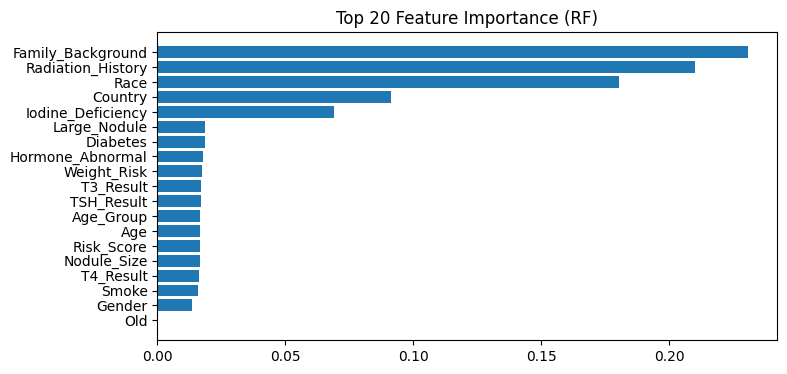

In [39]:
import matplotlib.pyplot as plt
feat_imp = best_model.feature_importances_
feat_name = X.columns
sorted_idx = np.argsort(feat_imp)[::-1][:20]
plt.figure(figsize=(8,4))
plt.barh(np.array(feat_name)[sorted_idx], feat_imp[sorted_idx])
plt.title("Top 20 Feature Importance (RF)")
plt.gca().invert_yaxis()
plt.show()

In [40]:
best_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
best_model.fit(X_res, y_res)
test_pred = best_model.predict_proba(test_processed)[:, 1]
submission['Cancer'] = (test_pred > 0.5).astype(int)
submission.to_csv('submission_best_rf.csv', index=False)

In [41]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 400],
    'max_depth': [None, 10, 20, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}
rf_search = RandomizedSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_distributions=param_dist, n_iter=20,
    scoring='f1', cv=3, n_jobs=-1
)
rf_search.fit(X_res, y_res)
print(rf_search.best_params_)

/Users/songbeom/PythonWorkSpace/ML_Project/venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None}


In [42]:
best_rf = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='log2',
    max_depth=None,
    class_weight='balanced',
    random_state=42
)
best_rf.fit(X_res, y_res)
test_pred = best_rf.predict_proba(test_processed)[:, 1]
submission['Cancer'] = (test_pred > 0.5).astype(int)
submission.to_csv('submission_best_rf_tuned.csv', index=False)